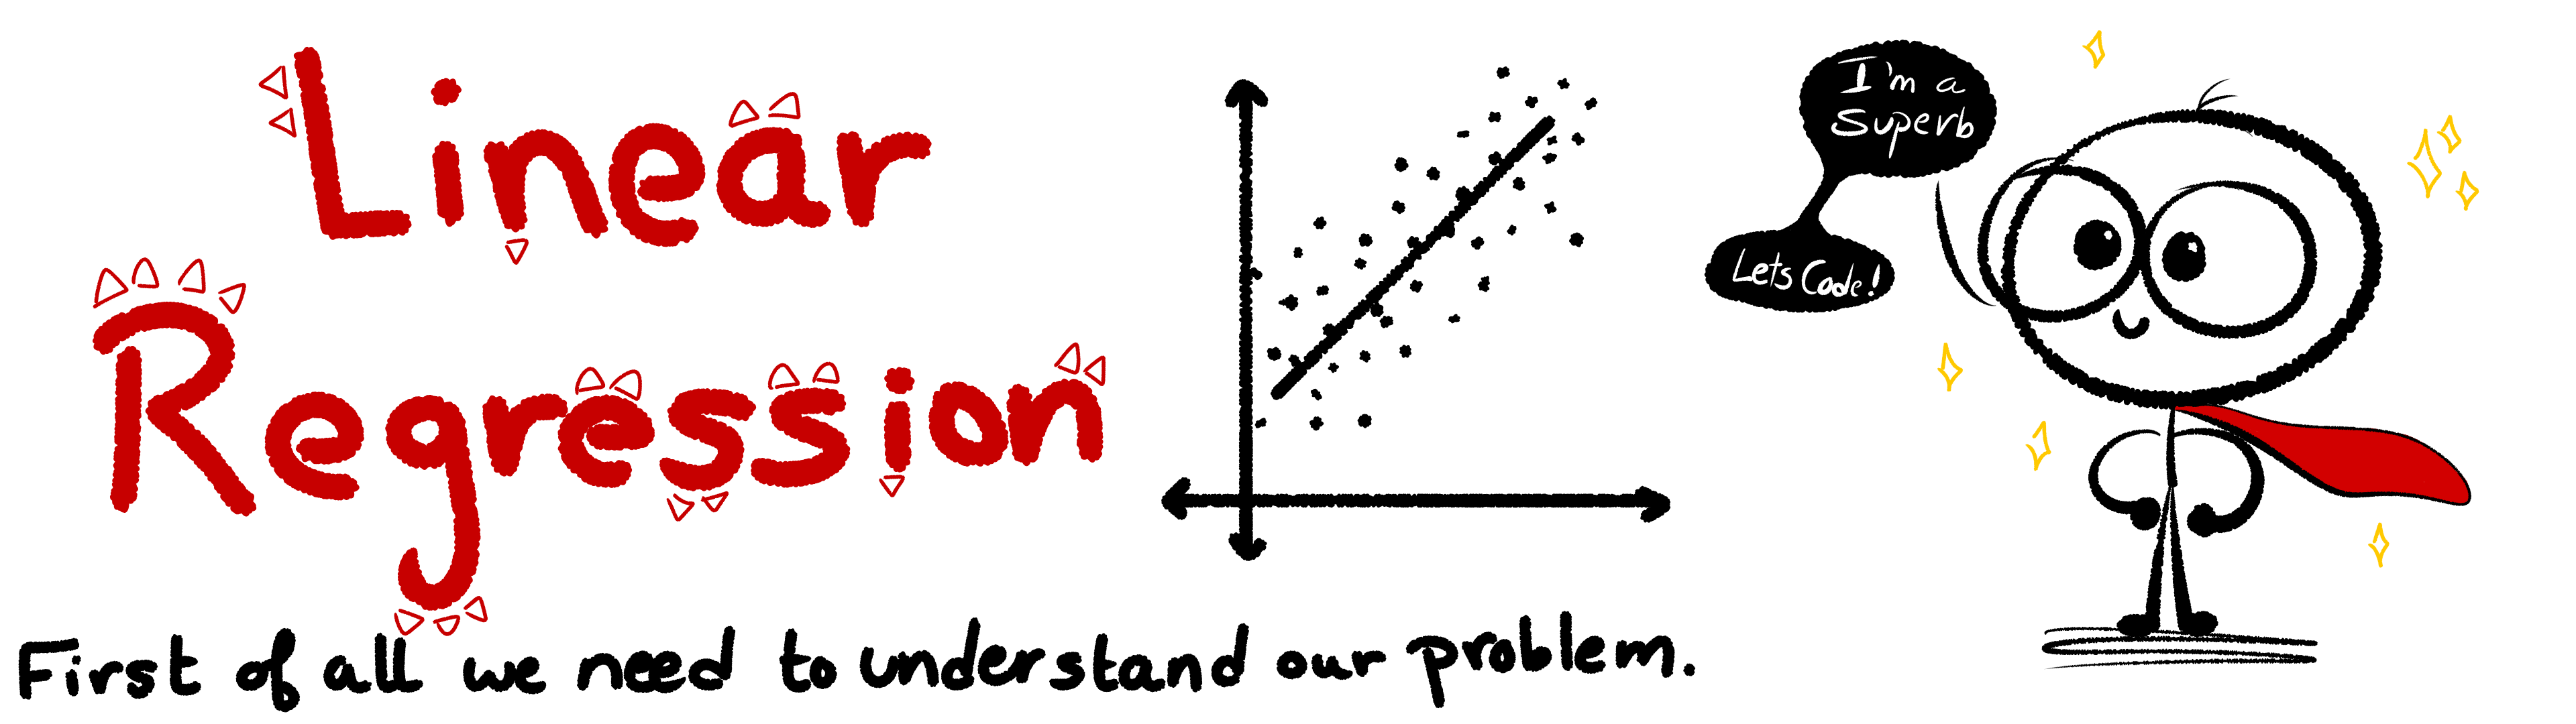

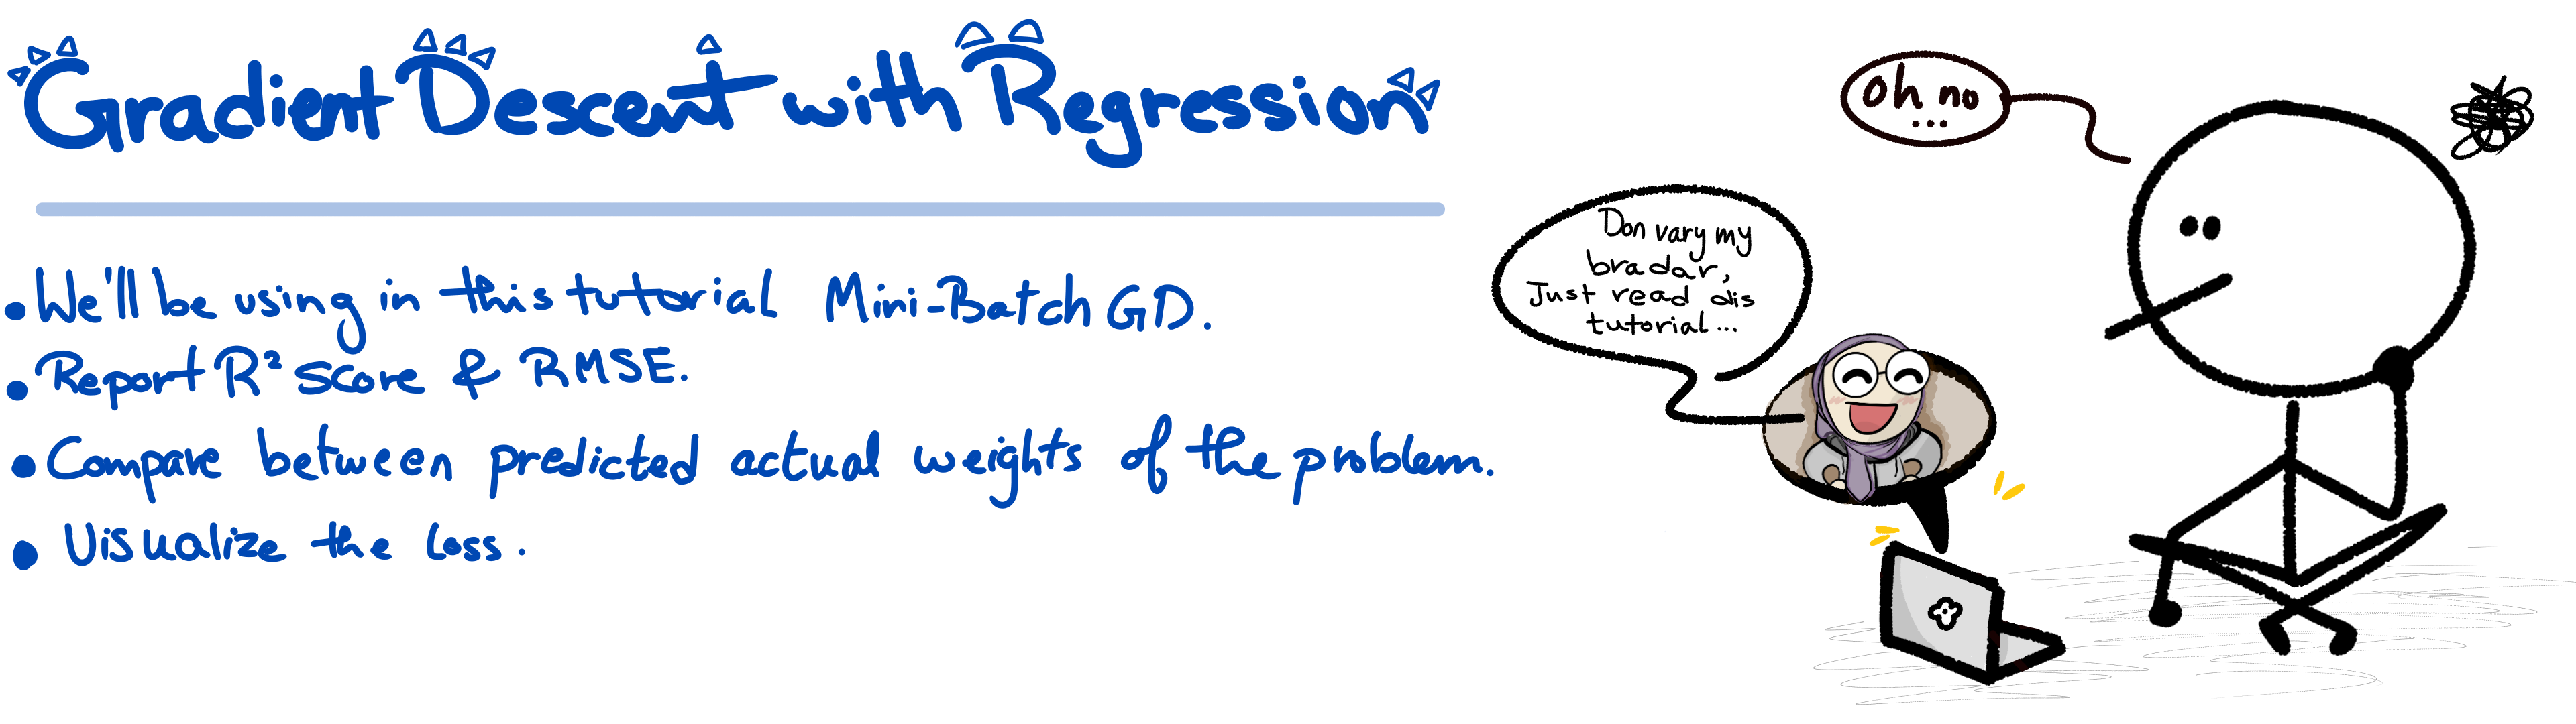

Import the required libraries you will use in this code 

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

Using make_regression function, we will import a random regression dataset.

In [7]:
# X represents the feature
# y represents the target

X,y = make_regression(n_samples=100 , n_features=1 , random_state=48)
X = X.reshape(100,1)
y = y.reshape(100,1)

Now lets see our dataset

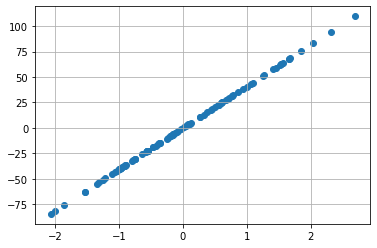

In [8]:
plt.scatter(X,y)
plt.grid()
plt.show()

Great!
Our data now is ready to enter the ML pipeline. But first...
## Lets implement the functions we are going to use.

We will use:
### miniGD: mini-batch gradient descent

In [21]:
def miniGD(X, y, ler_rate , max_iter):
    #initial thetas
    th0 = th1 = 0
    epoches = max_iter
    equivellant_Losses = []
    equivellant_Losses_batch = []
    thetas_0 = []
    thetas_1 = []

    for _ in range(epoches):
        #the batch's start and end size for thetas update 
        start = 0
        end = 16
        
        for i in range(int(len(X)/16)):
            h = th0+th1*X[start:end]
            
            #The batch MSE
            loss_batch = (1/(2*16)) * sum((h-y[start:end])**2) 
            equivellant_Losses_batch.append(loss_batch)
            
            #Gradients Update
            grd0 = (1/16) * sum((h-y[start:end]))
            grd1 = (1/16) * sum((h-y[start:end])*X[start:end])
            
            #Thetas Update
            th0 = th0 - ler_rate * grd0            
            th1 = th1 - ler_rate * grd1
            
            #Updateing batch indeces
            start = end
            end = end + 16
        
        #Appending the updated theta (each epoch) to the thetas lists
        thetas_0.append(th0)
        thetas_1.append(th1)
        
        #Calculate the loss and append it to the list
        loss = (1/(2*16)) * sum((h-y[start-16:end-16])**2) # MSE
        equivellant_Losses.append(loss)
    
    
    #Assign the optimum thetas reached after the loop ends
    optimum_theta_0 = thetas_0[-1]
    optimum_theta_1 = thetas_1[-1]
    
    #Calculate the predicted data usnig in the optimised thetas
    hypothesis_output = optimum_theta_0 + optimum_theta_1 * X
    
    return thetas_0, thetas_1, equivellant_Losses, hypothesis_output , \
    optimum_theta_0 , optimum_theta_1 , equivellant_Losses_batch


Now definte the learning rate and the Epochs then call the function


In [22]:
ler_rate = 0.006
epoches = 100
thetas_0_list, thetas_1_list, equivellant_Losses, hypothesis_output , \
optimum_theta_0 , optimum_theta_1 , equivellant_Losses_batch= miniGD(X , y , ler_rate , epoches)


View the Optimum theta1 and theta2

In [23]:
print(f'The optimum theta0 = {optimum_theta_0}')
print(f'The optimum theta1 = {optimum_theta_1}')

The optimum theta0 = [-0.14415291]
The optimum theta1 = [39.64352484]


### Draw the Regression line using the optimum thetas to compare your final weights with the output from a Normal Equation solution:

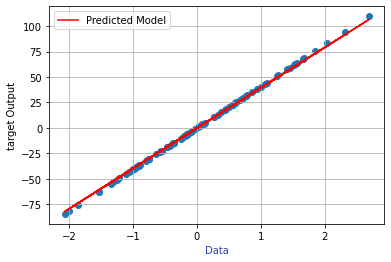

In [15]:
plt.plot(X,hypothesis_output , color='red' , label='Predicted Model')
plt.xlabel("Data" ,  color='#294399')
plt.ylabel("target Output")
plt.scatter(X,y)
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Calculate the R2 score

In [16]:
r2 = r2_score(y,hypothesis_output)
print(f'R2 Score= {r2}')

R2 Score= 0.9991912873595016


### Calculate the RMSE

In [17]:
MSE = mean_squared_error(y, hypothesis_output)
RMSE = math.sqrt(MSE)
print(f"Root Mean Square Error: {RMSE}")

Root Mean Square Error: 1.1619810410045872


We can notice that the score is nearly = 1. So lets keep into consideration an important note.. that this high score might affect negatively when dealing with real data which basically will not be 100% linear so in this case we should avoid overfitting the data inorder to perform better with the future coming data.

### Visualising the loss

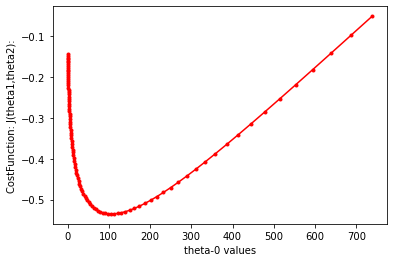

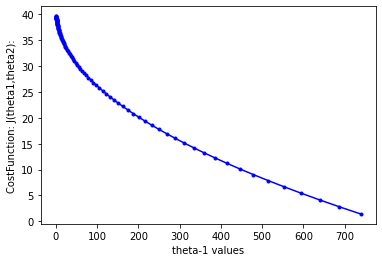

In [28]:
# Visualising loss wrt theta0
plt.plot(equivellant_Losses, thetas_0_list, '.-', color='red')
plt.xlabel('theta-0 values')
plt.ylabel('CostFunction: J(theta1,theta2):')
plt.show()

# Visualising loss wrt theta1
plt.plot(equivellant_Losses, thetas_1_list, '.-', color='blue')
plt.xlabel('theta-1 values')
plt.ylabel('CostFunction: J(theta1,theta2):')
plt.show()


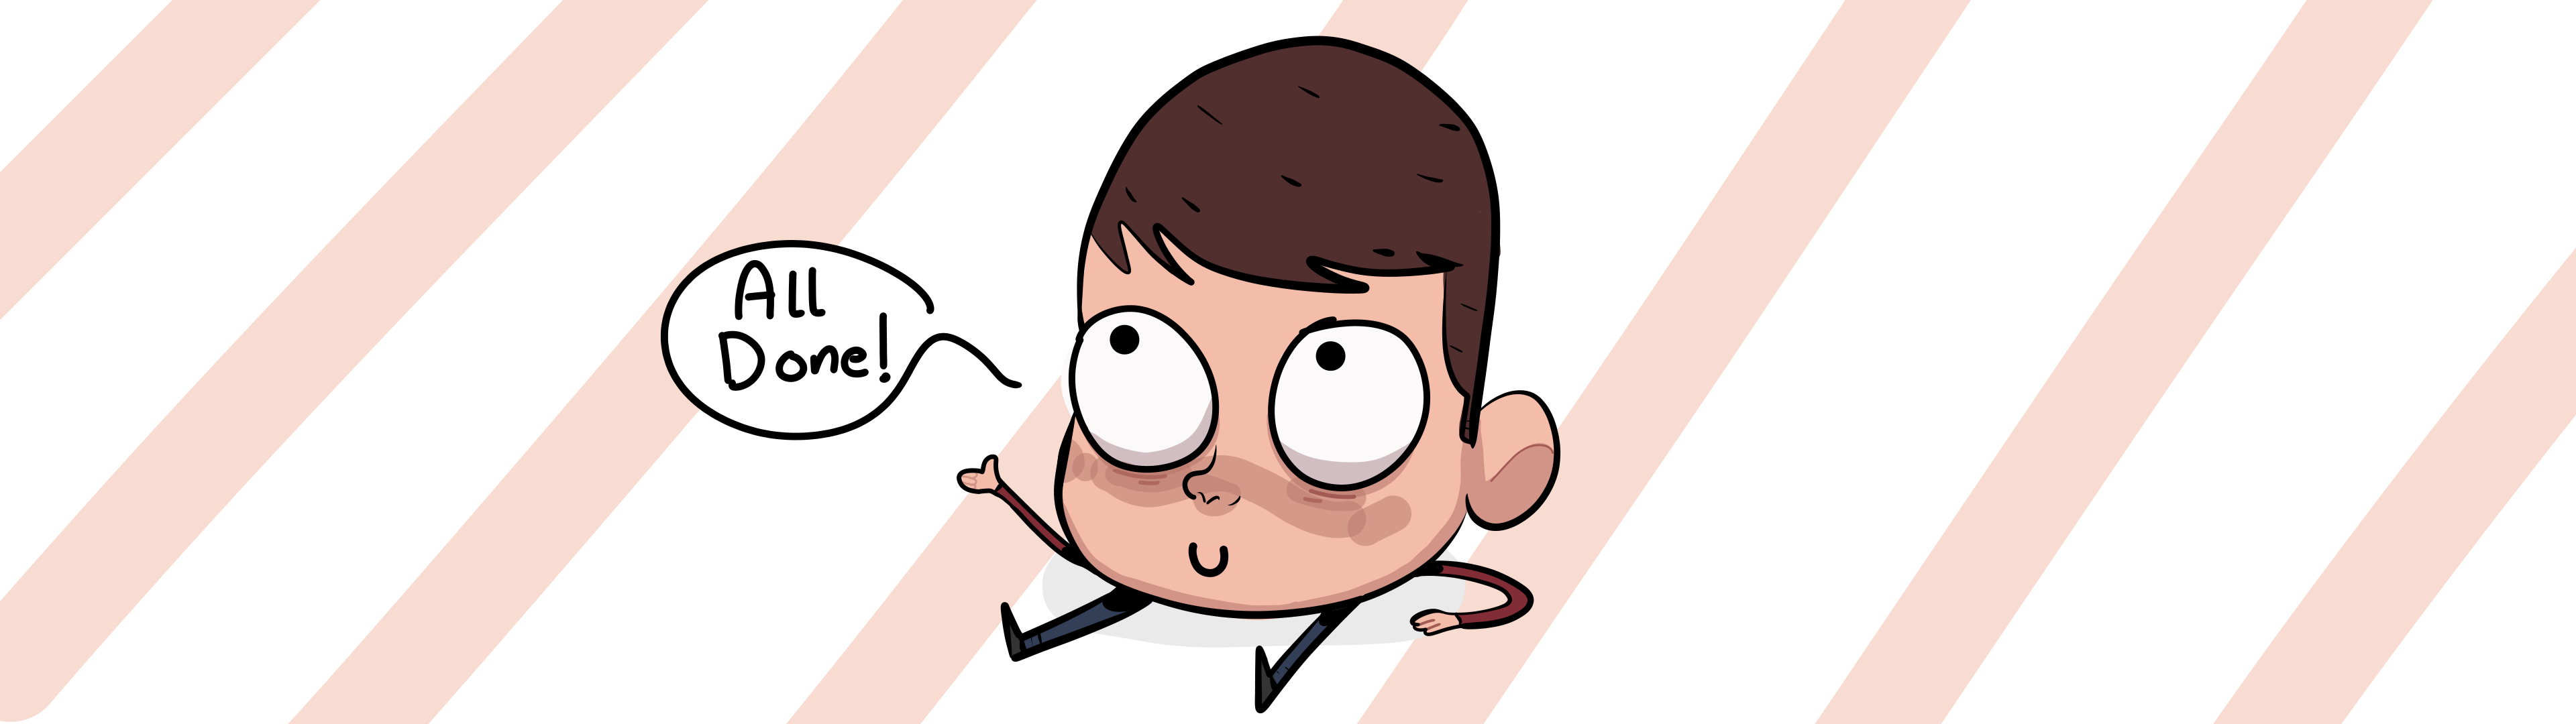